# Data Preparation
### Sheth Riya Nimish
### A0176880R
e0235287@u.nus.edu

#### This is the code that is used for data featurizing and data preprocessing. The code has been written entirely from scratch by me with the use of existing python libraries like matminer and pymatgen.

This code requires user input such as the name of the datafile, whether certain operations should or should not be performed. After the completion of the code a document is saved in the same folder as this code, it stores the summary of everything that took place in data featurizing and data preprocessing steps.

#### Table of Contents

* [The Workflow Followed in this Code](#wf)
* [Importing the Required Libraries](#import)
* [Creating a Document to Store the Results](#create)
* [Retrieval of Data](#ret)
   * [Reading the Data from the Data File](#read)
   * [Retrieval of Data from Databases](#databases)
* [Quality of Data](#qod)
* [Featurizing of the Data](#fet)
   * [Featurizing using Matminer](#featurize)
   * [Manual Featurizing of the Data](#amf)
* [Data Preprocessing](#prep)
   * [Data Cleaning](#cleaning)
   * [Data Transformation](#transformation)
   * [Data Reduction](#reduction)

### The Workflow Followed in this Code<a class="anchor" id="wf"></a>

In order to prepare the raw chemical data for machine learning algorithms, the process of data featurizing and data preprocessing is pivotal. Data featurizing is an important step as it helps transform and featurize complicated material attributes into numerical descriptors for data mining. Raw data is also inconsistent, noisy and incomplete. Hence, data preprocessing generates quality data.

![title](Pictures/workflow.png)

### Importing the Required Libraries<a class="anchor" id="import"></a>

In [1]:
import json
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
import argparse
import docx
import random
import seaborn as sns

### Creating a Document to Store the Results of Data Featurizing and Data Preprocessing <a class="anchor" id="create"></a>

In [2]:
mydoc= docx.Document()
mydoc.add_heading('Data Featurizing and Data Preprocessing', 0)

Supplementary Notes: Ensure there is a column called formula_pretty which contains the formula(i.e the material in the format IrF2 or Fe2O3) Otherwise a little modification of the code is required (each instance of formula_pretty should be replaced with the name of the formula column in the recieved data)

### Retrieval of Data <a class="anchor" id="ret"></a>

#### Reading the Data from the Data File<a class="anchor" id="read"></a>

In [3]:
filename=input("Filename:") #make sure the data file is in the same folder as this code is in
fileformat= input("Fileformat:") #supported formats are csv and json

materials=[]
if fileformat == "csv":
    df= pd.read_csv(filename)
else:
    with open(filename, 'r') as file:
        for line in file:
            materials.append(json.loads(line))
    df= pd.DataFrame.from_dict(materials)

Filename:Data1.json
Fileformat:json


#### Retrieval of the Data from Databases <a class="anchor" id="databases"></a>

In [4]:
#uncomment this section for data retrieval of a database and specifically computational 2d materials database

"""
C2DB
"""

"""
from ase.db import connect
count=0
db = connect('c2db.db')
formulae=[]
centerofmass=[] #array but this array has same number of elements
kineticenergy=[] #its all 0 for some reason
potentialenergy=[]
totalenergy=[]
#stress=[] #could not be found
volume=[]
pbc=[]#its an array
magmom=[] #gives the local magnetic moments
cell=[] #its an array
angularmomentum=[]
dipolemoment=[]
numberofatoms=[]
totalmagneticmoment=[]
magnetic=[]

allatoms=[]

for row in db.select():
    atoms = row.toatoms()
    allatoms.append(atoms)
    formulae.append(atoms.get_chemical_formula())
    centerofmass.append(atoms.get_center_of_mass())
    kineticenergy.append(atoms.get_kinetic_energy())
    potentialenergy.append(atoms.get_potential_energy())
    totalenergy.append(atoms.get_total_energy())
    #totalmagneticmoment.append(atoms.get_magnetic_moment())
    #stress.append(atoms.get_stress())
    volume.append(atoms.get_volume())
    pbc.append(atoms.get_pbc())
    #getting all the possible attributes stored in atoms
    magmom.append(atoms.get_initial_magnetic_moments())
    cell.append(atoms.get_cell())
    angularmomentum.append(atoms.get_angular_momentum())
    dipolemoment.append(atoms.get_dipole_moment())
    numberofatoms.append(len(atoms))
    calc= atoms.calc
    try:
        magnetic.append(calc.get_magnetic_moment())
    except:
        magnetic.append(0)
#print(len(magnetic))
c2db_df= pd.DataFrame({'formula': formulae, 'potentialenergy': potentialenergy, 'totalenergy': totalenergy, 'volume': volume, 'numberofatoms': numberofatoms, 'magnetic': magnetic})
c2db_df.shape
df= c2db_df

"""

"\nfrom ase.db import connect\ncount=0\ndb = connect('c2db.db')\nformulae=[]\ncenterofmass=[] #array but this array has same number of elements\nkineticenergy=[] #its all 0 for some reason\npotentialenergy=[]\ntotalenergy=[]\n#stress=[] #could not be found\nvolume=[]\npbc=[]#its an array\nmagmom=[] #gives the local magnetic moments\ncell=[] #its an array\nangularmomentum=[]\ndipolemoment=[]\nnumberofatoms=[]\ntotalmagneticmoment=[]\nmagnetic=[]\n\nallatoms=[]\n\nfor row in db.select():\n    atoms = row.toatoms()\n    allatoms.append(atoms)\n    formulae.append(atoms.get_chemical_formula())\n    centerofmass.append(atoms.get_center_of_mass())\n    kineticenergy.append(atoms.get_kinetic_energy())\n    potentialenergy.append(atoms.get_potential_energy())\n    totalenergy.append(atoms.get_total_energy())\n    #totalmagneticmoment.append(atoms.get_magnetic_moment())\n    #stress.append(atoms.get_stress())\n    volume.append(atoms.get_volume())\n    pbc.append(atoms.get_pbc())\n    #getting 

#### Quality of Data<a class="anchor" id="qod"></a>
This function gives a brief description of the quality of data at hand. The description includes number of rows and columns in the data, type of data stored in the columns, how dependent are the data columns or features on each other, how complete and unique the datasets are and finally the ratio of data to errors. This assists the user to assess the data and detect the irregularities.

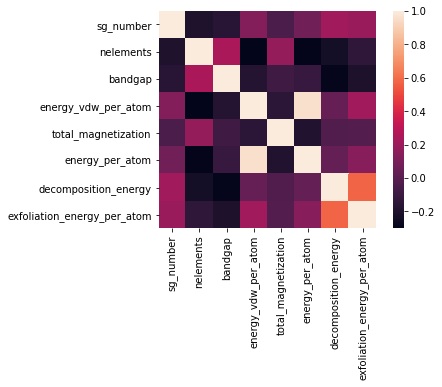

In [5]:
def qualityofdata(df):
    
    #an alternate way to check for duplicates
    
    """
    dups= df.iloc[:, 2].duplicated()
    countduplicated=0
    for i in range (0, len(dups)):
        if dups[i]== True:
            countduplicated= countduplicated+1
    """
    countduplicated=0
    mydoc.add_heading("Quality of Data", 1)
    mydoc.add_heading("Size of the Data", 6)
    mydoc.add_heading("Number of columns", 6)
    mydoc.add_paragraph(str(df.shape[1]))
    mydoc.add_heading("Number of rows", 6)
    mydoc.add_paragraph(str(df.shape[0]))
    mydoc.add_heading("Type of data in each of the columns", 6)
    mydoc.add_paragraph(str(df.dtypes))
    cor= df.corr()
    v= sns.heatmap(cor, square = True)
    plt.savefig("heatmatrix.png")
    mydoc.add_heading("The heat matrix of all the features", 6)
    mydoc.add_picture("heatmatrix.png")
    kv= df.describe()
    kv= kv.transpose()
    mydoc.add_heading("Detailed description of the data entries", 6)
    mydoc.add_paragraph(str(kv))
    mydoc.add_heading("Data Completedness: Number of incomplete data entries", 6)
    mydoc.add_paragraph(str(df.isna().sum().sum()))
    mydoc.add_heading("Data Uniqueness: Number of duplicates", 6)
    mydoc.add_paragraph(str(countduplicated))
    mydoc.add_heading("Ratio of data to errors:", 6)
    mydoc.add_paragraph(str((df.isna().sum().sum() + countduplicated)/df.shape[0]))
    
qualityofdata(df)

### Featurizing the Data <a class="anchor" id="fet"></a>

#### Featurize using Matminer <a class="anchor" id="featurize"></a>
To  featurize  the  dataframe,  a  python  library  called  matminer  was  used.   Mat-miner is used for data mining the propetries of materials.  It contains routinesfor obtaining data on material properties from various databases, featurizing com-plex materials attributes (e.g., composition, crystal structure, band structure) intophysically-relevant numerical quantities, and analyzing the results of data mining. An example of data featurizing can be seen here:
![title](Pictures/featurize.png)

In [6]:
from pymatgen import Composition #featurizing using matminer
mydoc.add_heading('A summary of the data featurizing process', 1)

# using the composition
try:
    from matminer.featurizers.conversions import StrToComposition
    stc= StrToComposition()
    df= stc.featurize_dataframe(df, "formula_pretty")
    #df= stc.featurize_dataframe(df, "formula")
    mydoc.add_paragraph("Converted formula into composition")
except:
    mydoc.add_paragraph("Unable to convert formula into composition")
        
try:
    from matminer.featurizers.composition import ValenceOrbital
    vo= ValenceOrbital()
    df= vo.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Valence Orbitals")
except:
    mydoc.add_paragraph("Unable to obtain the Valence Orbitals")

try:
    from matminer.featurizers.composition import BandCenter
    bc= BandCenter()
    df= bc.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Band Center")
except:
    mydoc.add_paragraph("Unable to obtain the Band Center")

try:
    from matminer.featurizers.composition import Stoichiometry
    smet= Stoichiometry()
    df= smet.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Stoichiometry")
except:
    mydoc.add_paragraph("Unable to obtain the Stoichiometry")

try:
    from matminer.featurizers.composition import IonProperty
    ip= IonProperty()
    df= ip.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Ion Property")
except:
    mydoc.add_paragraph("Unable to obtain the Ion Property")
    
try:
    from matminer.featurizers.composition import ElementFraction
    ef= ElementFraction()
    df= ef.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Element Fraction")
except:
    mydoc.add_paragraph("Unable to obtain the Element Fraction")

try:
    from matminer.featurizers.conversions import CompositionToOxidComposition
    ctoc= CompositionToOxidComposition()
    df= ctoc.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Oxidation Composition")
except:
    mydoc.add_paragraph("Unable to obtain the Oxidation Composition")

try:
    from matminer.featurizers.composition import OxidationStates
    os= OxidationStates()
    df= os.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Oxidation States")
except:
    mydoc.add_paragraph("Unable to obtain the Oxidation States")

try:
    from matminer.featurizers.composition import YangSolidSolution
    mg= YangSolidSolution()
    df= mg.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Yang Solid Solution")
except:
    mydoc.add_paragraph("Unable to obtain the Yang Solid Solution")
    
try:
    from matminer.featurizers.composition import ElectronAffinity
    ea= ElectronAffinity()
    df= mg.featurize_dataframe(df, "composition")
    mydoc.add_paragraph("Obtained the Electron Affinity")
except:
    mydoc.add_paragraph("Unable to obtain the Electron Affinity")

    
    
# using the structure
try:
    from matminer.featurizers.structure import DensityFeatures
    denfea= DensityFeatures()
    df= denfea.featurize_dataframe(df, "structure")
    mydoc.add_paragraph("Obtained the Density Features")
except:
    mydoc.add_paragraph("Unable to obtain the Density Features")
    
try:
    from matminer.featurizers.structure import Dimensionality
    dms= Dimesionality()
    df= dms.featurize_dataframe(df, "structure")
    mydoc.add_paragraph("Obtained the Dimensionality")
except:
    mydoc.add_paragraph("Unable to obtain the Dimensionality")

try:
    from matminer.featurizers.structure import EwaldEnergy
    eww= EwaldEnergy()
    df= eww.featurize_dataframe(df, "structure")
    mydoc.add_paragraph("Obtained the Ewald Energy")
except:
    mydoc.add_paragraph("Unable to obtain the Ewald Energy")

try:
    from matminer.featurizers.structure import GlobalInstabilityIndex
    gii= GlobalInstabilityIndex()
    df= gii.featurize_dataframe(df, "structure")
    mydoc.add_paragraph("Obtained the Global Instability Index")
except:
    mydoc.add_paragraph("Unable to obtain the Global Instability Index")

try:
    from matminer.featurizers.structure import MaximumPackingEfficieny
    mpe= MaximumPackingEfficiency()
    df= mpe.featurize_dataframe(df, "structure")
    mydoc.add_paragraph("Obtained the Maximum Packing Efficiency")
except:
    mydoc.add_paragraph("Unable to obtain the Maximum Packing Efficiency")



# using the site
try:
    from matminer.featurizers.site import CoordinationNumber
    cn= CoordinationNumber()
    df= cn.featurize_dataframe(df, "site")
    mydoc.add_paragraph("Obtained the Coordination Number") 
except:
    mydoc.add_paragraph("Unable to obtain the Coordination Number")

try:
    from matminer.featurizers.site import AverageBondLength
    abl= AverageBondLength()
    df= abl.featurize_dataframe(df, "site")
    mydoc.add_paragraph("Obtained the Average Bond Length") 
except:
    mydoc.add_paragraph("Unable to obtain the Average Bond Length")

try:
    from matminer.featurizers.site import AverageBondAngle
    aba= AverageBondAngle()
    df= aba.featurize_dataframe(df, "site")
    mydoc.add_paragraph("Obtained the Average Bond Angle") 
except:
    mydoc.add_paragraph("Unable to obtain the Average Bond Angle")

try:
    from matminer.featurizers.site import AGNIFingerprints
    afp= AGNIFingerprints()
    df= afp.featurize_dataframe(df, "site")
    mydoc.add_paragraph("Obtained the AGNIFingerprints") 
except:
    mydoc.add_paragraph("Unable to obtain the AGNIFingerprints")



StrToComposition:   0%|          | 0/6351 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/6351 [00:00<?, ?it/s]

BandCenter:   0%|          | 0/6351 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/6351 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/6351 [00:00<?, ?it/s]

ElementFraction:   0%|          | 0/6351 [00:00<?, ?it/s]

CompositionToOxidComposition:   0%|          | 0/6351 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/6351 [00:00<?, ?it/s]

YangSolidSolution:   0%|          | 0/6351 [00:00<?, ?it/s]

DensityFeatures:   0%|          | 0/6351 [00:00<?, ?it/s]

EwaldEnergy:   0%|          | 0/6351 [00:00<?, ?it/s]

GlobalInstabilityIndex:   0%|          | 0/6351 [00:00<?, ?it/s]

#### Additiontal Manual Featurizing<a class="anchor" id="amf"></a>

#### Number of Atoms 
This functions counts the number of atoms in the molecule.

In [7]:
def number_of_atoms(formula):
    numberofatoms=[]
    
    for i in range(len(formula)):
        
        compound= formula[i]
        counter=0
        stringcounter=0
        numbercounter=0
    
        for v in range(0, len(compound)):
            
            if(compound[v].isnumeric()):
                counter= counter+ int(compound[v])
                numbercounter+=1
            else:
                if(compound[v].isupper()):
                    stringcounter+=1
                    
        counter= counter + stringcounter - numbercounter
        numberofatoms.append(counter)
        
    return numberofatoms

#### Number of Magnetic Atoms
This function calculates the number of magnetic atoms present in the molecule.

In [8]:
def number_of_magnetic_atoms(formula):
    
    magnetic_atoms= ["Fe", "Co", "Dy", "Sm", "Ni", "Gd", "Nd"] #the magnetic atoms of the periodic table
    count=0
    tr=0
    numberofmagneticatoms=[]
    
    for i in range(len(formula)):
        
        compound= formula[i]
        count=0
        
        for j in range(0, len(magnetic_atoms)):
            
            if magnetic_atoms[j] in compound:
                pos= compound.index(magnetic_atoms[j])
                if(pos+2 != len(compound)): #here each of the magnetic_atoms has a short form of 2 characters
                    if(compound[pos+2].isnumeric()):
                        count= count + int(compound[pos+2])
                    else:
                        count= count+1
                else:
                    count= count+1
                    
        numberofmagneticatoms.append(count)
        
    return numberofmagneticatoms



In [9]:
#adding the features manually coded.
try:
    #numberofatoms= number_of_atoms(df['formula'])
    numberofatoms= number_of_atoms(df['formula_pretty'])
    mydoc.add_paragraph("Obtained the Number of Atoms")
except:
    mydoc.add_paragraph("Unable to obtain the Number of Atoms")

try:
    #numberofmagneticatoms= number_of_magnetic_atoms(df['formula'])
    numberofmagneticatoms= number_of_magnetic_atoms(df['formula_pretty'])
    mydoc.add_paragraph("Obtained the Number of Magnetic Atoms")
except:
    mydoc.add_paragraph("Unable to obtain the Number of Magnetic Atoms")

    
df.insert(2, "number_of_magnetic_atoms", numberofmagneticatoms, True)
df.insert(3, "number_of_atoms", numberofatoms, True)

In [10]:
#updating the doc after the process of data featurizing
mydoc.add_heading('Columns after data featurizing', 1)
mydoc.add_paragraph(str(df.shape[1]))
mydoc.add_paragraph(list(df.columns))
mydoc.add_heading('Data Entries', 1)
mydoc.add_paragraph(str(df.shape[0]))

### Data Preprocessing<a class="anchor" id="prep"></a>
Real-world data may be inconsistent, noisy and incomplete.  Hence,data preprocessing generates quality data.
![title](Pictures/dfdppic.png)

### Data Cleaning <a class="anchor" id="cleaning"></a>

In [11]:
mydoc.add_heading('Summary of Data Preprocessing', 1)
mydoc.add_heading('The summary of the data cleaning', 6)

In the sub-stepdata cleaning, it is crucial to remove data that has no numerical signifance such as data of discovery, text data and so forth.

In [12]:
#removing columns with no numerical significance
mydoc.add_heading('Deleting columns with no numerical significance', 6)
x= df.select_dtypes(['number'])
mydoc.add_heading('Number of columns with no numerical significance', 6)
mydoc.add_paragraph(str(df.shape[0]- x.shape[0]))


In the sub-stepdata cleaning, it is crucial to remove redundant data suchas columns with low variance, that is features which do not vary much withinitself and have little predictive power.

In [13]:
#deleting columns with low variance
mydoc.add_heading('Deleting columns with low variance', 6)
count = (x.nunique())
to_del = [i for i,v in enumerate(count) if v == 1]
for i in range(len(to_del)):
    t= to_del[i]
    x.drop(x.columns[t-i], axis=1, inplace=True)

df= x

#### Data Imputation
Data imputation is the process of replacing missing data with substitutedvalues (obtained through methods like regression or clustering).  Often times, missing data entries are replaced with the average value of the entire column. Here, the user is offered a choice about whether  data imputation should be performed or not. Since, this step is very subjective to the quality and the use of data.

In [14]:
#deleting rows with missing data and duplicate data
def dataimputation(df):
    df= df.fillna(df.mean())
    return df

mydoc.add_heading("Performing data imputation", 6)
datai= input("Enter yes for replacing all missing data with the mean value of the column and no if you want to delete data entries: ")

if datai== 'yes':
    df= dataimputation(df)
    mydoc.add_paragraph("All missing data replaced with the mean value of the column")

else:
    mydoc.add_paragraph('Deleting data entries with missing data')
    original= df.shape[1]
    df= df.dropna()
    new= df.shape[1]
    mydoc.add_paragraph('Number of data entries with missing data which were deleted')
    mydoc.add_paragraph(str(original-new))

Enter yes for replacing all missing data with the mean value of the column and no if you want to delete data entries: no


Checking for duplicate data points and deleting duplicate data entries.

In [72]:
#removing duplicate data points
mydoc.add_heading('Checking for Duplicates', 6)
dups= list(df.duplicated())
countduplicated=0
for i in range (0, len(dups)):
    if dups[i]== True:
        countduplicated= countduplicated+1
if countduplicated==0:
    mydoc.add_paragraph('No duplicates present')
else:
    df.drop_duplicates()
    mydoc.add_paragraph('Duplicates were present and they have been dropped')

### Data Transformation<a class="anchor" id="transformation"></a>

In [50]:
mydoc.add_heading("The summary of data transformation", 1)
mydoc.add_heading("Conducting data binning", 6)

#### Data binning
Thebinningor discretization or concept hierarchy generation method is usedto minimize the effects of small observational errors and smoothen out the data. Data binning groups numbers having continuous values into smaller bins. The number of bins and the width is determined using Sturge’s rule:number of bins = 1 + log2(length of data).

In [51]:
def create_bins(lower_bound, width, quantity):
    
    bins=[]
    
    for i in range(quantity):
        if i == quantity-1:
            bins.append((lower_bound+i*width, lower_bound+(i+1)*width+0.1))
        else:
            bins.append((lower_bound+i*width, lower_bound+(i+1)*width))
        
    return bins

def find_bin(value, bins):
    
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
        
def binning():
    
    #Using Sturge's Rule for bin calculation
    k= math.ceil(1+ math.log2(len(x)))
    mydoc.add_paragraph('The number of bins created:')
    mydoc.add_paragraph(str(k))
    column_names=list(x.columns.values)
    binned_x= pd.DataFrame()
    print(column_names)
    for i in range(len(column_names)):
        
        if(x.columns[i]=="total_magnetization"):
            binned_x.insert(0, x.columns[i], x[column_names[i]].tolist(), True)
            continue
        columns_into_list=[]
        columns_into_list= x[column_names[i]].values
        lower_bound= min(columns_into_list)
        #print(lower_bound)
        upper_bound= max(columns_into_list)
        #print(upper_bound)
        width= (upper_bound - lower_bound)/k
        bins= create_bins(lower_bound, width, k)

        t=[]
        for j in range (len(columns_into_list)):
            t.append(find_bin(columns_into_list[j], bins))
        
        binned_x.insert(0, x.columns[i], t, True)
    
    return binned_x

x=df
df= binning()

['sg_number', 'number_of_magnetic_atoms', 'number_of_atoms', 'nelements', 'bandgap', 'energy_vdw_per_atom', 'total_magnetization', 'energy_per_atom', 'decomposition_energy', 'exfoliation_energy_per_atom', 'avg s valence electrons', 'avg p valence electrons', 'avg d valence electrons', 'avg f valence electrons', 'frac s valence electrons', 'frac p valence electrons', 'frac d valence electrons', 'frac f valence electrons', 'band center', '0-norm', '2-norm', '3-norm', '5-norm', '7-norm', '10-norm', 'max ionic char', 'avg ionic char', 'H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'P

#### Data Normalisation
The goal of data normalizationis to change the values of numeric columnsin the data set to a common scale, without distorting differences in the rangesof values.  This ensures that one attribute is not given greater importance justby virtue of higher magnitudes of the attribute entries.

In [52]:
mydoc.add_heading("Conducting data normalisation", 6)
k= math.ceil(1+ math.log2(len(x)))
df= df.div(k)
mydoc.add_paragraph("Values in all the columns are now in the range of 0 to 1")

### Data Reduction <a class="anchor" id="reduction"></a>

#### Numerosity Reduction
The code gives the option to reduce the number of data entries. In case, the data is extremely huge and it could exponentially increase the time and resources of the machine learning algorithms there would be an algorithm in place to reduce the data size.

In [53]:
mydoc.add_heading('Summary of Data Reduction', 1)
mydoc.add_heading('Conducting Numerosity Reduction', 6)
reduction= input("Fraction of Data to be Kept (0 for nothing, 1 for all): ")
mydoc.add_paragraph("Fraction of Numerosity Reduction by")
mydoc.add_paragraph(reduction)
df= df.sample(frac=float(reduction), replace=False, random_state=1)
mydoc.add_paragraph("Number of data entries reduced")
mydoc.add_paragraph(str(x.shape[0]-df.shape[0]))

Fraction of Numerosity Reduction by: 1


#### Dimensionality Reduction
In a machine learning model, each feature shouldbe independent otherwise the problem of multi-collinearity that leads to re-dundant variables in the machine learning model arises.  Hence, a pair-plot isused to plot pairwise relationships of each attribute in a dataset.  The pair-plots which depict a relation(for instance:  linear, exponential etc) should be investigated and appropriate attribute selection must be performed.

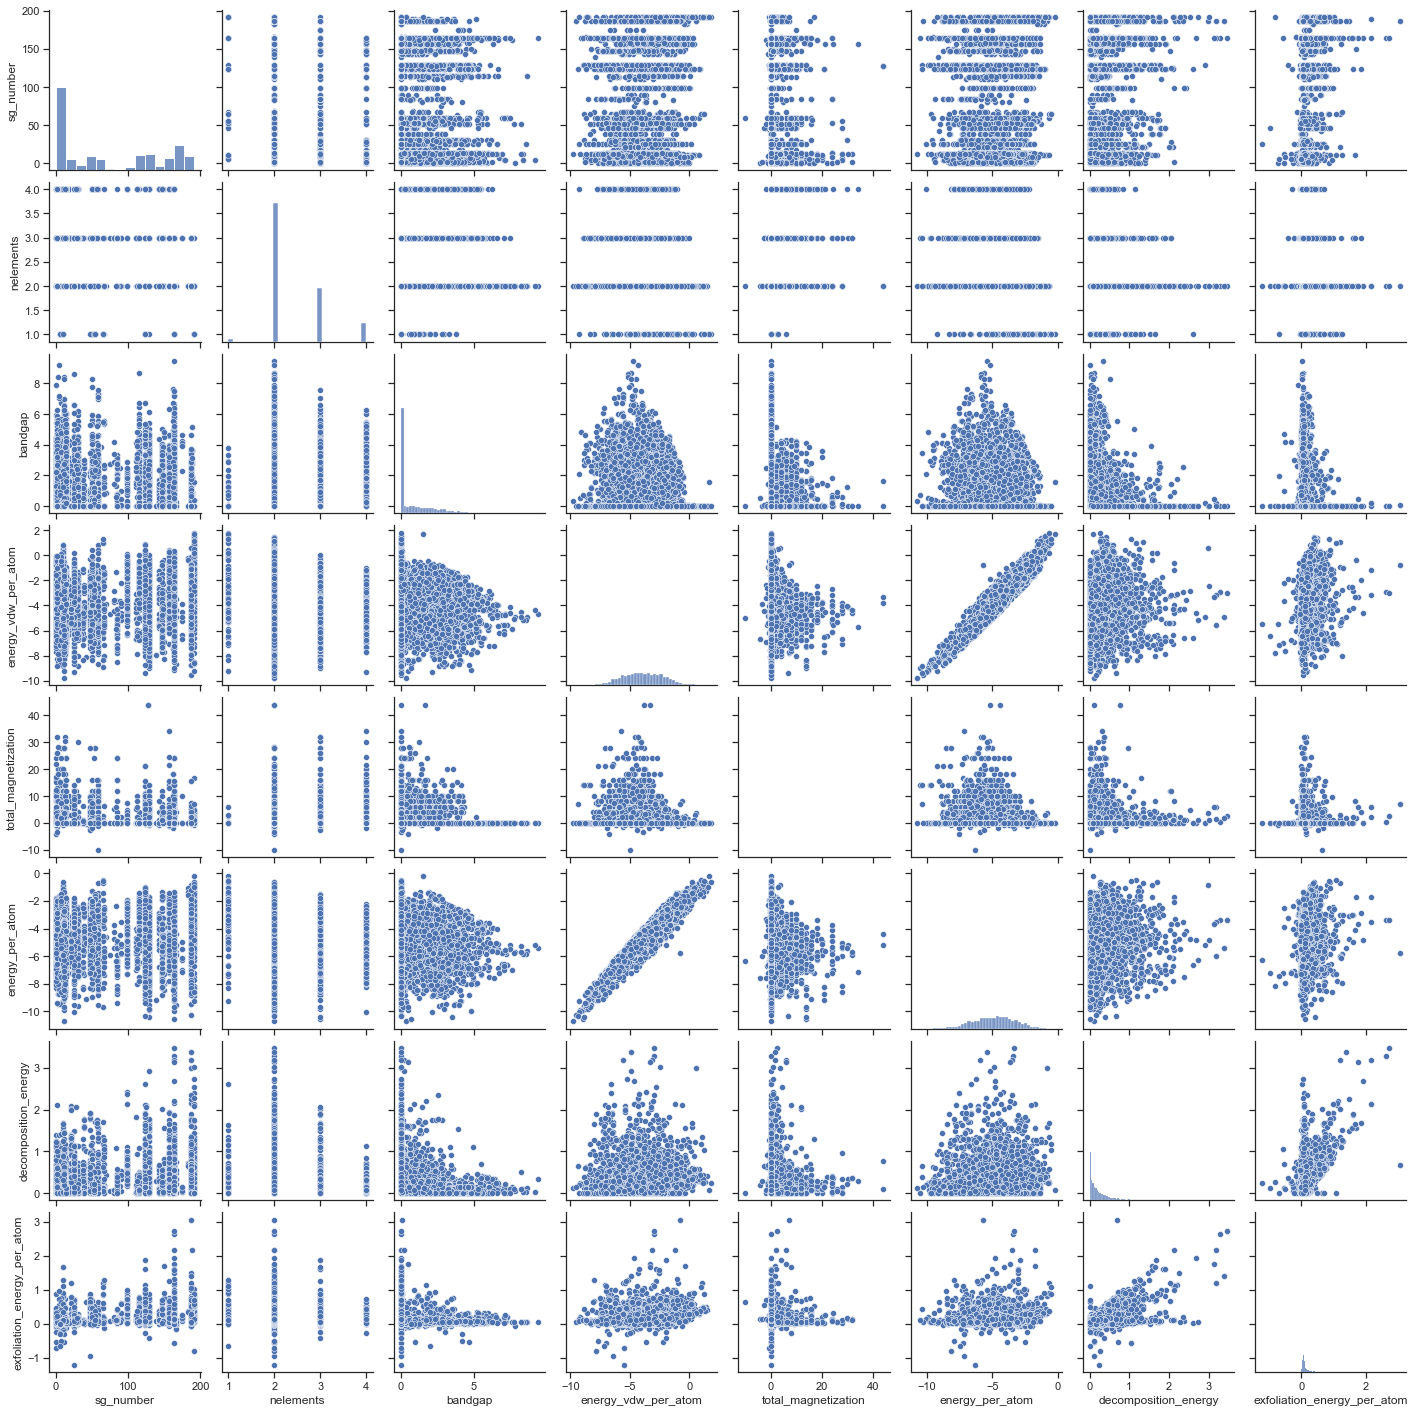

In [54]:
mydoc.add_heading('Conducting Dimensionality Reduction', 6)
dftemp= pd.DataFrame.from_dict(materials)
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dftemp)
g.savefig("pairplot.png")
mydoc.add_paragraph("The graph of dependence of attributes on each other")
mydoc.add_picture("pairplot.png")
mydoc.add_paragraph("Action should be taken after a manual visual inspection of the plot")

#### Clustering
While ideally clusters should be available for each pair of features, that would result in 156C2 graphs. Hence, a feature to obtain as many number of graphs as needed has been given in the code, along with the number of clusters wanted. That is the user can define how many cluster plots he/she would like to see, after that he/she would enter the rows and columns of each of those cluster plots and the number of clusters they would like to see in the plot. This is a method of manual inspection of the data. An example of the clustering can be seen below, where the data is divided into four clusters, each red dot being the centroid of one of the clusters. In this particular example nothing can be narrowed done from clustering, like was the case with many data pairs.

Number of cluster plots wanted:1
Enter column name 1:Fe
Enter column name 2:Cl
Enter no of clusters3


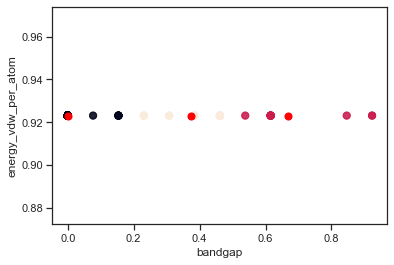

In [56]:
mydoc.add_heading('Clustering the Data', 6)
from sklearn.cluster import KMeans
def clustering(column1, column2, noofclusters):
    c1= df[column1]
    c2= df[column2]
    temp= pd.DataFrame(list(zip(c1, c2)), columns=['x','y'])
    kmeans = KMeans(n_clusters=noofclusters).fit(temp)
    centroids = kmeans.cluster_centers_
    plt.scatter(temp['x'], temp['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.xlabel("bandgap")
    plt.ylabel("energy_vdw_per_atom")
    plt.savefig("clusterplot.png")
    mydoc.add_picture("clusterplot.png")

noofclusterplots= input("Number of cluster plots wanted:")
for i in range(0, int(noofclusterplots)):
    col1= input("Enter column name 1:")
    col2= input("Enter column name 2:")
    dataframecolumns= df.columns
    poscol1=-1
    poscol2=-1
    for i in range (0, len(dataframecolumns)):
        if dataframecolumns[i]== col1:
            poscol1= i
            break
            
    for i in range (0, len(dataframecolumns)):
        if dataframecolumns[i]== col2:
            poscol2= i
            break
            
    noofclusters= input("Enter no of clusters")
    clustering(col1, col2, int(noofclusters))
    mydoc.add_paragraph("Created above cluster plot for following columns")
    mydoc.add_paragraph(str(col1))
    mydoc.add_paragraph(str(col2))
    

End of the process of data featurizing and data preprocessing

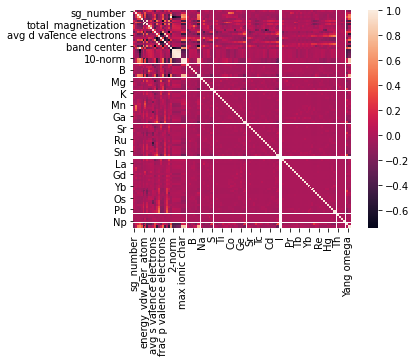

In [15]:
#Storing the quality of data after the entire process of data featurizing an data preprocessing.
qualityofdata(df)
mydoc.add_heading("End of Data Featurizing and Data Pre-processing")
mydoc.add_paragraph("Data is now ready for input in machine learning and deep learning algorithms")
mydoc.save("DFDP-Results.docx")
df.to_csv("DataAfterDFDP.CSV")